In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_excel(r"C:\ratings,review project\ratings_data.xlsx")
df

,Product_Review,Ratings
0,Fantastic ❤️ stylish and comes wd super qualit...,5
1,"Very nice, can wear in night also",5
2,"Worth for the money, awesome product and quali...",5
3,I'm quite happy with the product. A little bit...,5
4,The frame is good looks premium.. but i dont k...,4
...,...,...
21828,Low price and very good quality I'm very happy...,5
21829,Great Experience and Nice shoes\nIt's awesome ...,4
21830,Grt product only little size issue,5
21831,Very Nice Product I love it,5


In [31]:
df.shape

(21833, 2)

In [32]:
df.info

<bound method DataFrame.info of                                           Product_Review  Ratings
0      Fantastic ❤️ stylish and comes wd super qualit...        5
1                      Very nice, can wear in night also        5
2      Worth for the money, awesome product and quali...        5
3      I'm quite happy with the product. A little bit...        5
4      The frame is good looks premium.. but i dont k...        4
...                                                  ...      ...
21828  Low price and very good quality I'm very happy...        5
21829  Great Experience and Nice shoes\nIt's awesome ...        4
21830                 Grt product only little size issue        5
21831                        Very Nice Product I love it        5
21832   Excellent fit and comfortable as well as stylish        5

[21833 rows x 2 columns]>

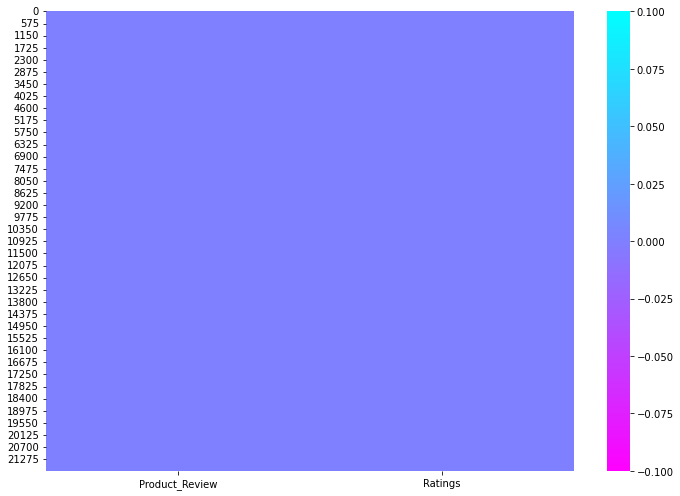

Product_Review    0
Ratings           0
dtype: int64

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()


# No missing values are present

# Exploration of Target Variable Ratings

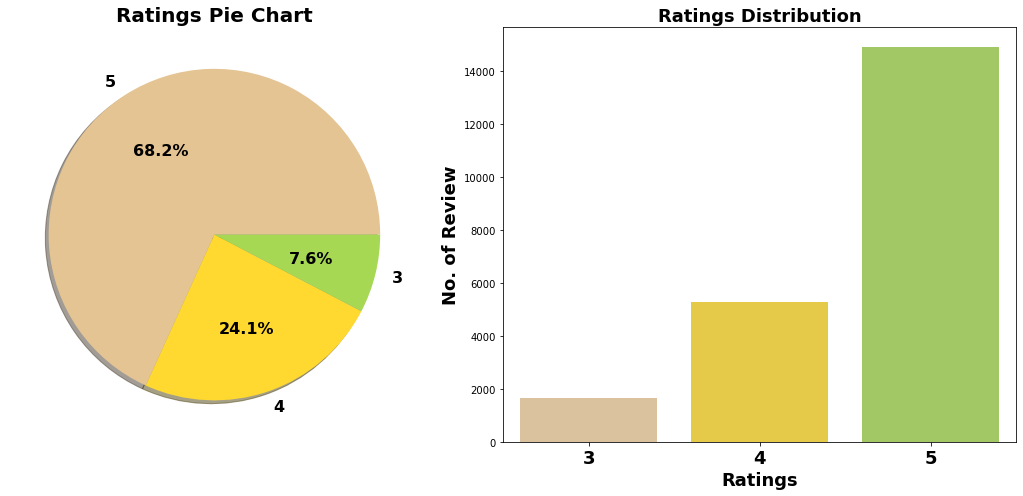

Value Counts of Rating:


5    14892
4     5272
3     1669
Name: Ratings, dtype: int64

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()

Importing required libraries for Text mining

In [35]:
!pip install wordcloud

In [36]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [37]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [10]:
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

21830             grt product little size issue
21831                         nice product love
21832    excellent fit comfortable well stylish
Name: Product_Review, dtype: object

In [38]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df

,Product_Review,Ratings
0,"[fantastic, stylish, and, comes, wd, super, qu...",5
1,"[very, nice, can, wear, in, night, also]",5
2,"[worth, for, the, money, awesome, product, and...",5
3,"[i, m, quite, happy, with, the, product, a, li...",5
4,"[the, frame, is, good, looks, premium, but, i,...",4
...,...,...
21828,"[low, price, and, very, good, quality, i, m, v...",5
21829,"[great, experience, and, nice, shoes, it, s, a...",4
21830,"[grt, product, only, little, size, issue]",5
21831,"[very, nice, product, i, love, it]",5


In [39]:
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [40]:
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

21833


[['fantast', 'stylish', 'and', 'come', 'super', 'qualiti', 'for'],
 ['veri', 'nice', 'can', 'wear', 'night', 'also'],
 ['worth',
  'for',
  'the',
  'money',
  'awesom',
  'product',
  'and',
  'qualiti',
  'realli',
  'good',
  'brand',
  'name',
  'fastrack',
  'speak']]

In [41]:
df['clean_review']=processed_review

In [43]:
df

,Product_Review,Ratings,clean_review
0,"[fantastic, stylish, and, comes, wd, super, qu...",5,"[fantast, stylish, and, come, super, qualiti, ..."
1,"[very, nice, can, wear, in, night, also]",5,"[veri, nice, can, wear, night, also]"
2,"[worth, for, the, money, awesome, product, and...",5,"[worth, for, the, money, awesom, product, and,..."
3,"[i, m, quite, happy, with, the, product, a, li...",5,"[quit, happi, with, the, product, littl, bite,..."
4,"[the, frame, is, good, looks, premium, but, i,...",4,"[the, frame, good, look, premium, but, dont, k..."
...,...,...,...
21828,"[low, price, and, very, good, quality, i, m, v...",5,"[low, price, and, veri, good, qualiti, veri, h..."
21829,"[great, experience, and, nice, shoes, it, s, a...",4,"[great, experi, and, nice, shoe, awesom, love]"
21830,"[grt, product, only, little, size, issue]",5,"[grt, product, onli, littl, size, issu]"
21831,"[very, nice, product, i, love, it]",5,"[veri, nice, product, love]"


In [44]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))

In [45]:
one = df['Product_Review'][df['Ratings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [46]:
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Review'])
X=features
Y=df[['Ratings']]

In [47]:
X.shape

(21833, 5417)

In [48]:
Y.shape

(21833, 1)

# Let's do the Model Building part

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (15283, 5417)
Training target vector size: (15283, 1)
Test feature matrix size: (6550, 5417)
Test target vector size: (6550, 1)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7552671755725191 on Random_state 76


# Logistics Regression

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7476335877862595


Confusion matrix of Logistics Regression : 
 [[ 104   10  372]
 [   0  383 1215]
 [   3   53 4410]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           3       0.97      0.21      0.35       486
           4       0.86      0.24      0.37      1598
           5       0.74      0.99      0.84      4466

    accuracy                           0.75      6550
   macro avg       0.86      0.48      0.52      6550
weighted avg       0.78      0.75      0.69      6550



In [54]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.68307763 0.67597893 0.64254637 0.59367842 0.57810353]
Mean CV Score : 0.6346769765033864
Std deviation : 0.04240716554783795


# Decision Tree Classifier

In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7409160305343512


Confusion matrix of Decision Tree Classifier : 
 [[ 155   45  286]
 [  36  645  917]
 [  95  318 4053]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           3       0.54      0.32      0.40       486
           4       0.64      0.40      0.50      1598
           5       0.77      0.91      0.83      4466

    accuracy                           0.74      6550
   macro avg       0.65      0.54      0.58      6550
weighted avg       0.72      0.74      0.72      6550



In [56]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.72544081 0.76414014 0.60590795 0.54374714 0.42166743]
Mean CV Score : 0.6121806922174082
Std deviation : 0.12404622494134794


# AdaBoost Classifier

In [57]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.7331297709923664


Confusion matrix of AdaBoost Classifier : 
 [[ 106    4  376]
 [   5  320 1273]
 [  22   68 4376]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           3       0.80      0.22      0.34       486
           4       0.82      0.20      0.32      1598
           5       0.73      0.98      0.83      4466

    accuracy                           0.73      6550
   macro avg       0.78      0.47      0.50      6550
weighted avg       0.75      0.73      0.67      6550



In [59]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.64804213 0.67574994 0.64071445 0.5742098  0.48350893]
Mean CV Score : 0.604445052380842
Std deviation : 0.06905110779827907


# Gradient Boosting Classifier

In [60]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.7506870229007634


Confusion matrix of Gradient Boosting Classifier : 
 [[ 103    1  382]
 [   1  365 1232]
 [   0   17 4449]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           3       0.99      0.21      0.35       486
           4       0.95      0.23      0.37      1598
           5       0.73      1.00      0.85      4466

    accuracy                           0.75      6550
   macro avg       0.89      0.48      0.52      6550
weighted avg       0.81      0.75      0.69      6550



In [61]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.68216167 0.68284864 0.66567438 0.63078333 0.54993129]
Mean CV Score : 0.6422798586953478
Std deviation : 0.04988810843576587


# GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.768 total time=  14.3s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.775 total time=  14.1s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.765 total time=  14.0s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.779 total time=  14.1s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.777 total time=  14.1s
[CV 1/5; 2/12] STAR

[CV 5/5; 9/12] END criterion=entropy, max_features=auto, n_estimators=150;, score=0.776 total time=  27.8s
[CV 1/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 1/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.770 total time=  16.5s
[CV 2/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 2/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.775 total time=  16.5s
[CV 3/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 3/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.763 total time=  16.4s
[CV 4/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 4/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.774 total time=  16.4s
[CV 5/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 5/5; 10/12] END criterion=entropy, max_features=log2, n_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [65]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 75}

# Result

In [66]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 150,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.7819847328244275


Confusion matrix of Random Forest Classifier : 
 [[ 139    8  339]
 [   6  559 1033]
 [  14   28 4424]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           3       0.87      0.29      0.43       486
           4       0.94      0.35      0.51      1598
           5       0.76      0.99      0.86      4466

    accuracy                           0.78      6550
   macro avg       0.86      0.54      0.60      6550
weighted avg       0.81      0.78      0.74      6550



# Saving model

In [67]:
import joblib
joblib.dump(Final_mod,'Review_Rating_project.pkl')

['Review_Rating_project.pkl']